In [4]:
import pandas as pd


df_experiment = pd.read_csv("C:/Ironhack/ih - projects/vanguard-ab-test/df_final_experiment_clients.txt")


In [5]:
df_web1 = pd.read_csv("C:/Ironhack/ih - projects/vanguard-ab-test/df_final_web_data_pt_1.txt")
df_web2 = pd.read_csv("C:/Ironhack/ih - projects/vanguard-ab-test/df_final_web_data_pt_2.txt")


In [6]:
# Check the first few rows of each DataFrame to understand their structure
print("Shape of Part 1:", df_web1.shape)
print("Shape of Part 2:", df_web2.shape)


print("Columns in Part 1:", df_web1.columns.tolist())
print("Columns in Part 2:", df_web2.columns.tolist())



Shape of Part 1: (343141, 5)
Shape of Part 2: (412264, 5)
Columns in Part 1: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']
Columns in Part 2: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']


In [7]:
df_web = pd.concat([df_web1, df_web2], ignore_index=True)



In [8]:
df_demo = pd.read_csv("C:/Ironhack/ih - projects/vanguard-ab-test/df_final_demo.txt")


In [9]:
# Overview of each dataset
print("Web Data Shape:", df_web.shape)
print("Demo Data Shape:", df_demo.shape)
print("Experiment Clients Shape:", df_experiment.shape)

# Data types and nulls
print(df_web.info())
print(df_demo.info())
print(df_experiment.info())


Web Data Shape: (755405, 5)
Demo Data Shape: (70609, 9)
Experiment Clients Shape: (70609, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5 

In [10]:
# Change date_time to datetime format
df_web['date_time'] = pd.to_datetime(df_web['date_time'])


In [11]:
df_demo.isnull().sum()


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [12]:
df_demo_clean = df_demo.dropna()
print("Cleaned demo shape:", df_demo_clean.shape)


Cleaned demo shape: (70594, 9)


In [13]:
# Remove clients who were not part of the A/B test
df_experiment_clean = df_experiment.dropna(subset=['Variation'])


In [14]:
# Step 1: Merge experiment with demo data
df_exp_demo = pd.merge(df_experiment_clean, df_demo_clean, on='client_id', how='inner')

# Step 2: Merge that with web data
df_full = pd.merge(df_exp_demo, df_web, on='client_id', how='inner')

print("Final merged dataset shape:", df_full.shape)
df_full.head()


Final merged dataset shape: (321195, 14)


,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Text(0.5, 1.0, 'Gender Distribution')

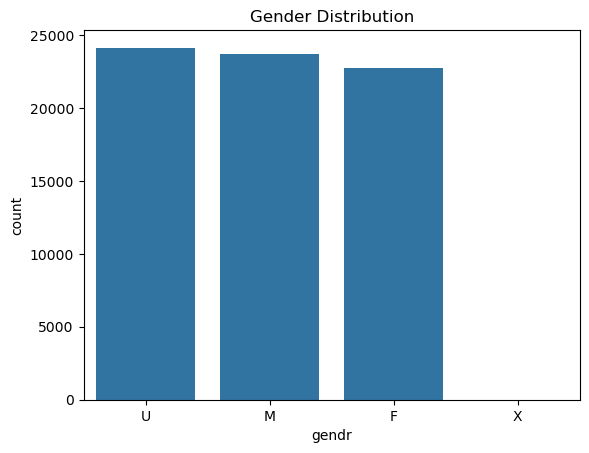

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution
sns.countplot(x='gendr', data=df_demo_clean)
plt.title('Gender Distribution')


Text(0.5, 0, 'Age')

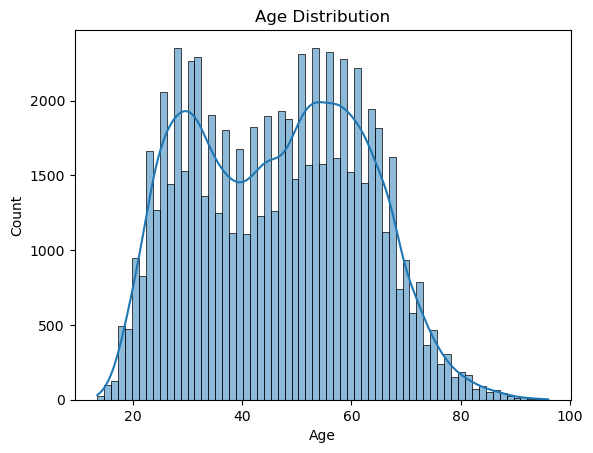

In [16]:

# Age distribution
sns.histplot(df_demo_clean['clnt_age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')


Text(0.5, 1.0, 'Number of Accounts per Client')

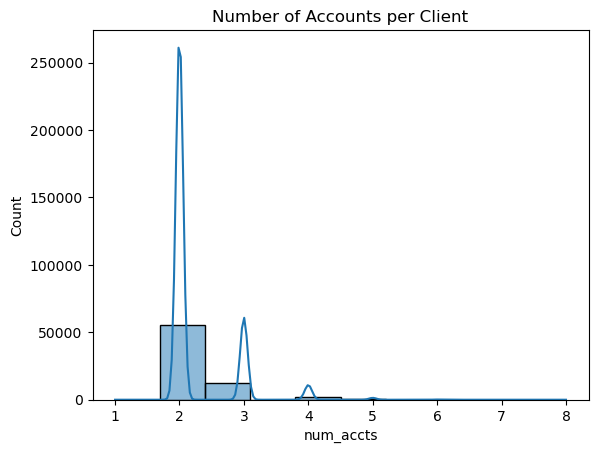

In [17]:

# Account distribution
sns.histplot(df_demo_clean['num_accts'], bins=10, kde=True)
plt.title('Number of Accounts per Client')


Text(0.5, 0, 'Balance')

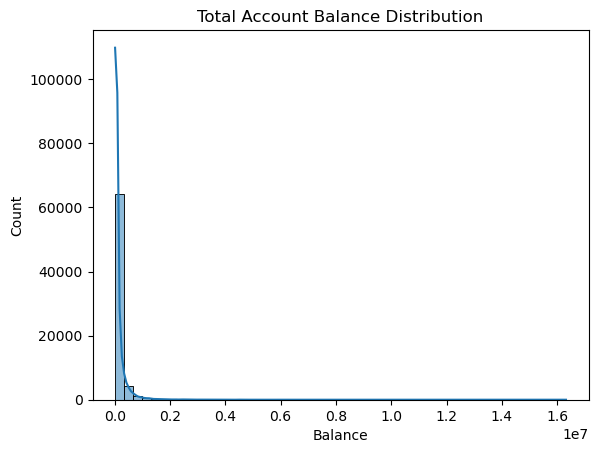

In [18]:

# Balance distribution
sns.histplot(df_demo_clean['bal'], bins=50, kde=True)
plt.title('Total Account Balance Distribution')
plt.xlabel('Balance')


Text(0.5, 1.0, 'Tenure by Group (Years)')

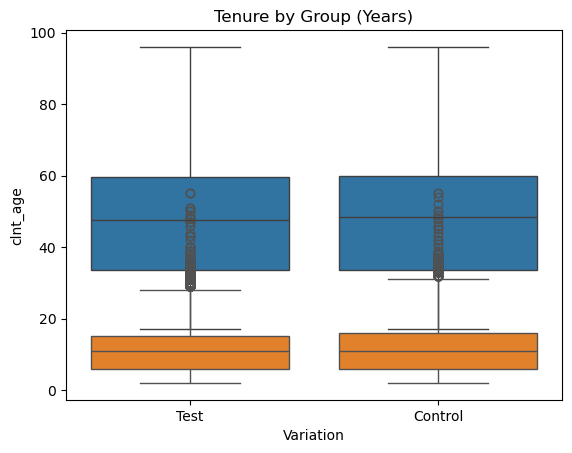

In [19]:
# Age & tenure analysis
sns.boxplot(x='Variation', y='clnt_age', data=df_exp_demo)
plt.title('Age by Group')

sns.boxplot(x='Variation', y='clnt_tenure_yr', data=df_exp_demo)
plt.title('Tenure by Group (Years)')


In [20]:
# Grouping
age_groups = pd.cut(df_demo_clean['clnt_age'], bins=[0, 30, 45, 60, 90], labels=['<30', '30-45', '45-60', '60+'])
tenure_groups = pd.cut(df_demo_clean['clnt_tenure_yr'], bins=[0, 1, 5, 10, 40], labels=['<1yr', '1-5yr', '5-10yr', '10+yr'])

print(age_groups.value_counts())
print(tenure_groups.value_counts())


clnt_age
45-60    22087
30-45    18982
60+      15460
<30      14024
Name: count, dtype: int64
clnt_tenure_yr
10+yr     36125
5-10yr    22223
1-5yr     12172
<1yr          0
Name: count, dtype: int64


In [21]:
step_counts = df_web['process_step'].value_counts().sort_index()
print(step_counts)


process_step
confirm    102963
start      243945
step_1     163193
step_2     133062
step_3     112242
Name: count, dtype: int64


In [22]:
steps_per_client = df_web.groupby('client_id')['process_step'].nunique()
steps_per_client.describe()


count    120157.000000
mean          4.103981
std           1.447308
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: process_step, dtype: float64

In [23]:
completed_clients = df_web[df_web['process_step'] == 'confirmation_page']['client_id'].unique()
df_exp_demo['completed'] = df_exp_demo['client_id'].isin(completed_clients)


Text(0.5, 1.0, 'Completion Rate by Group')

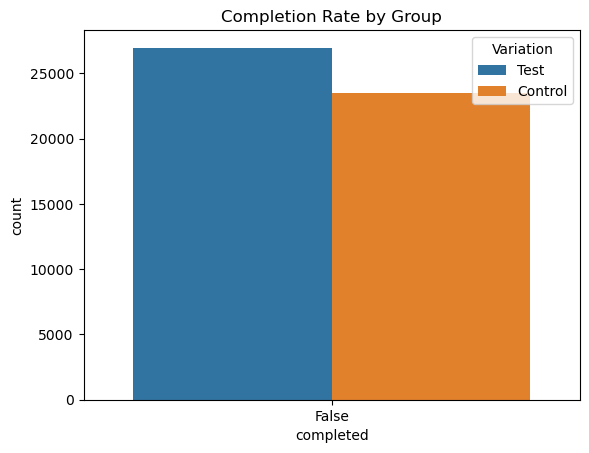

In [24]:
sns.countplot(x='completed', hue='Variation', data=df_exp_demo)
plt.title('Completion Rate by Group')


In [25]:
completed_ids = df_web[df_web['process_step'] == 'confirmation_page']['client_id'].unique()
df_full['completed'] = df_full['client_id'].isin(completed_ids)


Text(0, 0.5, 'Logons (6 Months)')

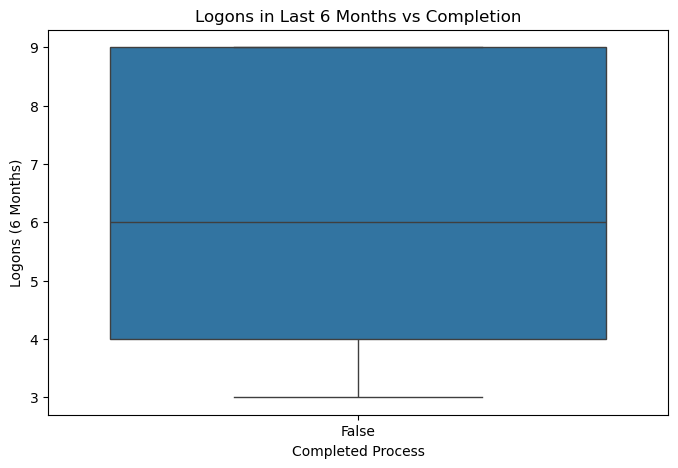

In [26]:
# Boxplot of logons by completion status
plt.figure(figsize=(8, 5))
sns.boxplot(x='completed', y='logons_6_mnth', data=df_full)
plt.title('Logons in Last 6 Months vs Completion')
plt.xlabel('Completed Process')
plt.ylabel('Logons (6 Months)')

Text(0, 0.5, 'Calls (6 Months)')

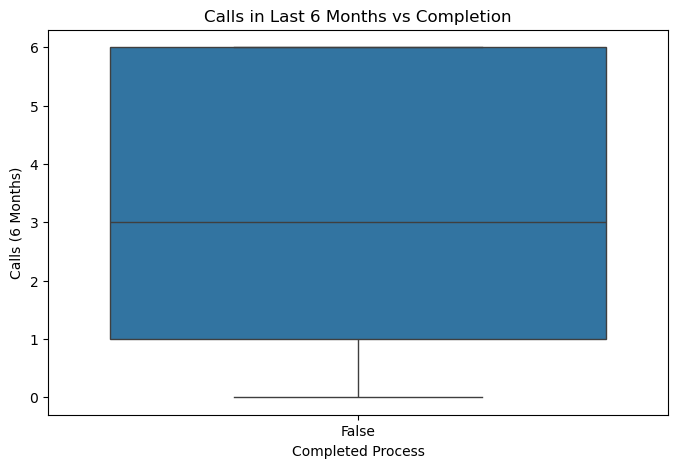

In [27]:
# Boxplot of calls by completion
plt.figure(figsize=(8, 5))
sns.boxplot(x='completed', y='calls_6_mnth', data=df_full)
plt.title('Calls in Last 6 Months vs Completion')
plt.xlabel('Completed Process')
plt.ylabel('Calls (6 Months)')


In [28]:
steps_by_client = df_web.groupby('client_id')['process_step'].nunique().reset_index()
steps_by_client.columns = ['client_id', 'steps_completed']

# Merge with balance data
balance_vs_steps = pd.merge(steps_by_client, df_demo_clean[['client_id', 'bal']], on='client_id')


Text(0, 0.5, 'Total Balance ($)')

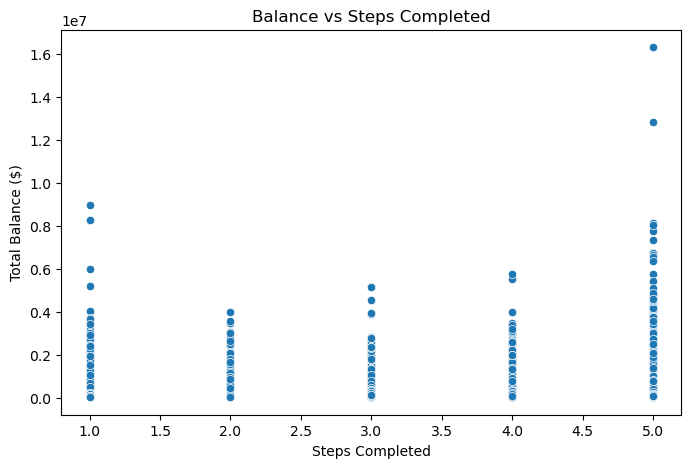

In [29]:
# Scatterplot or regression
plt.figure(figsize=(8, 5))
sns.scatterplot(x='steps_completed', y='bal', data=balance_vs_steps)
plt.title('Balance vs Steps Completed')
plt.xlabel('Steps Completed')
plt.ylabel('Total Balance ($)')


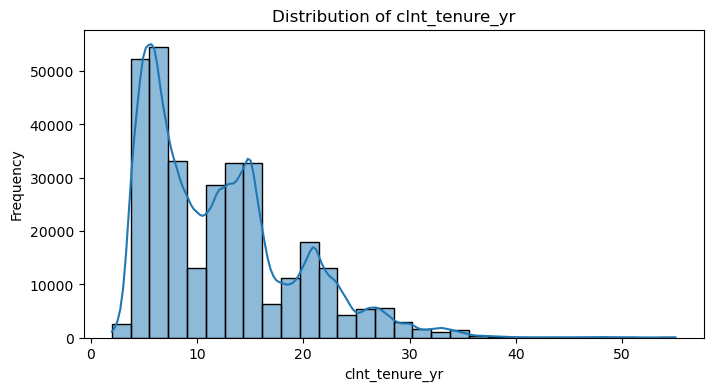

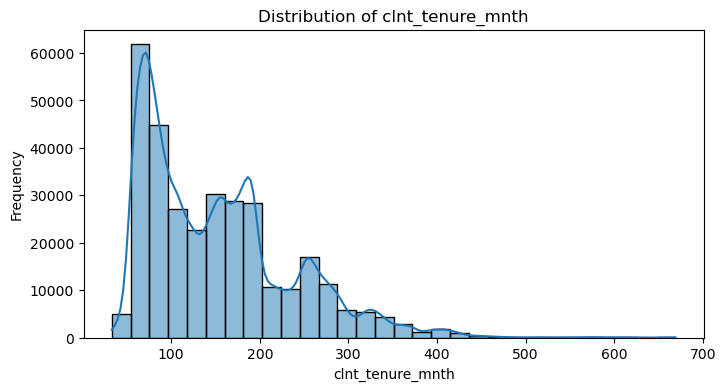

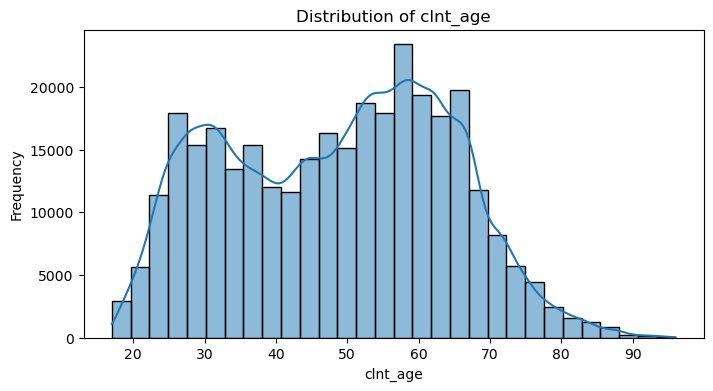

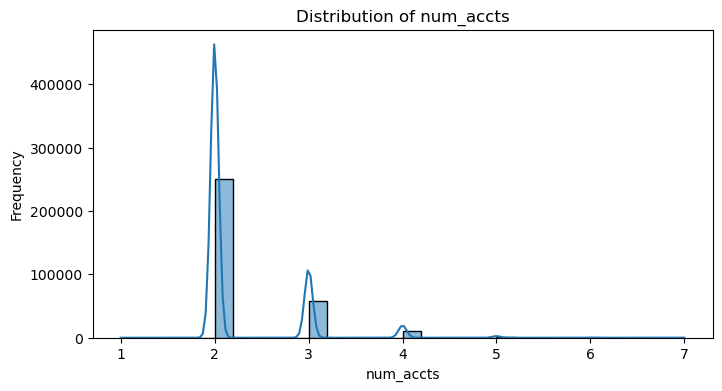

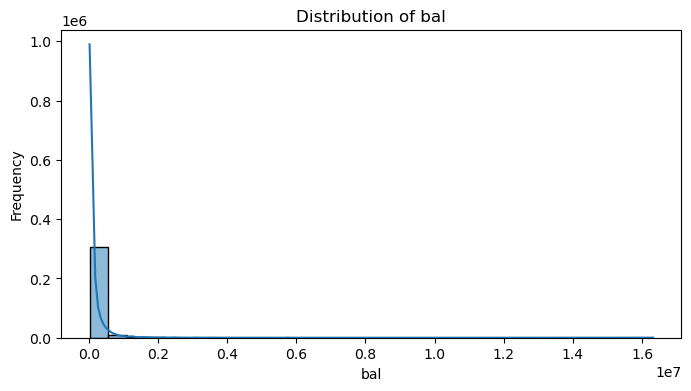

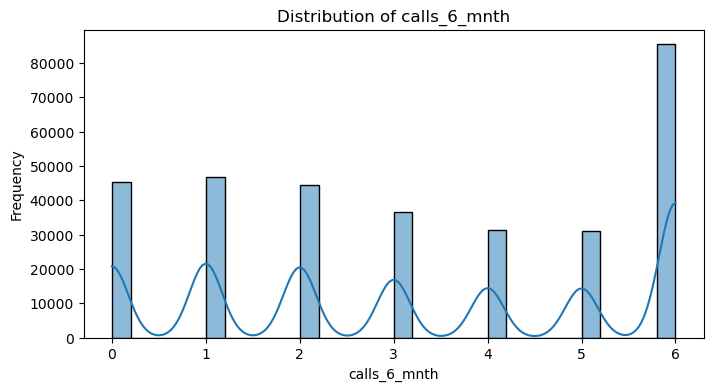

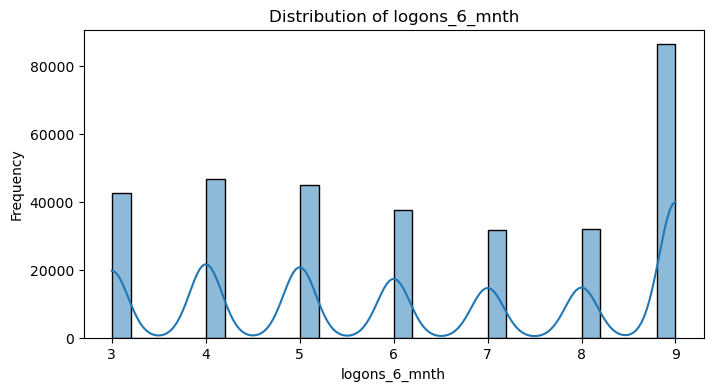

In [30]:
# Plot distributions
numeric_cols = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_full[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [31]:
df_full.to_csv("merged_ab_experiment.csv", index=False)


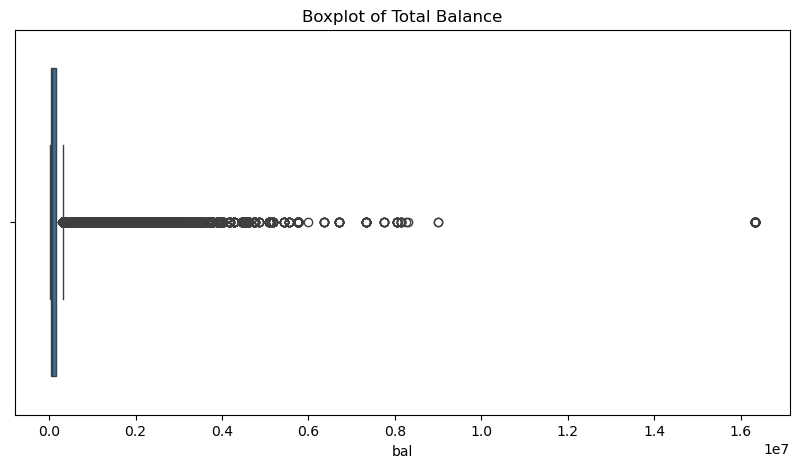

In [32]:
# Quick boxplot for balance
plt.figure(figsize=(10,5))
sns.boxplot(x=df_full['bal'])
plt.title('Boxplot of Total Balance')
plt.show()


Variation
Test       177787
Control    143408
Name: count, dtype: int64


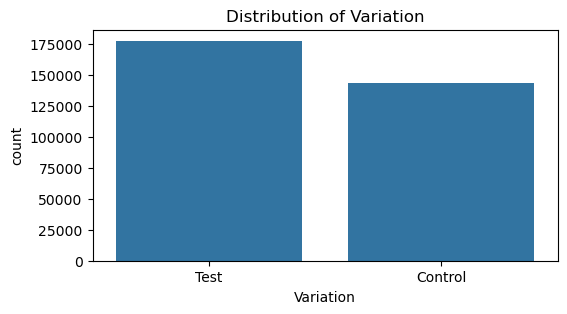

gendr
U    108884
M    108013
F    104290
X         8
Name: count, dtype: int64


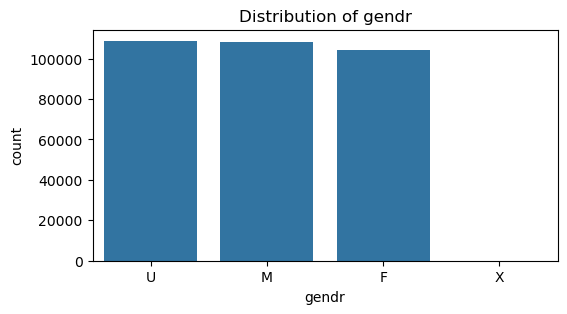

process_step
start      104041
step_1      68410
step_2      56855
step_3      48675
confirm     43214
Name: count, dtype: int64


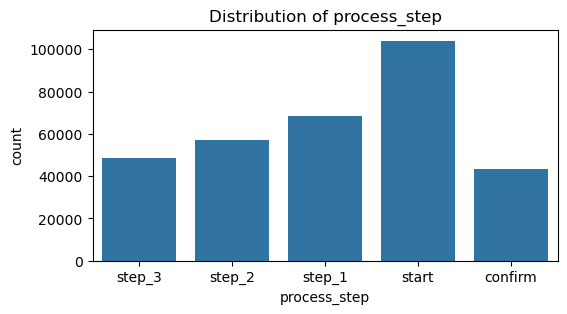

In [33]:
# Categorical columns distribution
cat_cols = ['Variation', 'gendr', 'process_step']

for col in cat_cols:
    print(df_full[col].value_counts())
    plt.figure(figsize=(6,3))
    sns.countplot(x=df_full[col])
    plt.title(f'Distribution of {col}')
    plt.show()


In [34]:
# Clients who experienced Version A (Control)
df_version_a = df_full[df_full['Variation'] == 'Control']

# Clients who experienced Version B (Test)
df_version_b = df_full[df_full['Variation'] == 'Test']


In [35]:
# Average age
print("Average Age:")
print("Control:", df_version_a['clnt_age'].mean())
print("Test:", df_version_b['clnt_age'].mean())

# Average tenure
print("\nAverage Tenure (Years):")
print("Control:", df_version_a['clnt_tenure_yr'].mean())
print("Test:", df_version_b['clnt_tenure_yr'].mean())

# Gender distribution
print("\nGender Distribution (Counts):")
print("Control:\n", df_version_a['gendr'].value_counts(normalize=True))
print("Test:\n", df_version_b['gendr'].value_counts(normalize=True))

# Number of accounts
print("\nAverage Number of Accounts:")
print("Control:", df_version_a['num_accts'].mean())
print("Test:", df_version_b['num_accts'].mean())

# Total balance
print("\nAverage Total Balance:")
print("Control:", df_version_a['bal'].mean())
print("Test:", df_version_b['bal'].mean())


Average Age:
Control: 48.30989554278701
Test: 48.75001828030171

Average Tenure (Years):
Control: 12.172152181189334
Test: 12.180058159482977

Gender Distribution (Counts):
Control:
 gendr
U    0.344193
M    0.336962
F    0.318846
Name: proportion, dtype: float64
Test:
 gendr
M    0.335739
U    0.334805
F    0.329411
X    0.000045
Name: proportion, dtype: float64

Average Number of Accounts:
Control: 2.2740223697422737
Test: 2.254039946677766

Average Total Balance:
Control: 159408.41653624625
Test: 164477.4268792994


In [36]:
# First, filter the df_full for only experiment dates
mask = (df_full['date_time'] >= '2017-03-15') & (df_full['date_time'] <= '2017-06-20')
df_experiment_period = df_full[mask]


In [37]:
# Age distribution per variation
age_stats = df_experiment_period.groupby('Variation')['clnt_age'].describe()

# Gender distribution per variation
gender_counts = df_experiment_period.groupby(['Variation', 'gendr'])['client_id'].nunique().unstack()

# Tenure distribution per variation
tenure_stats = df_experiment_period.groupby('Variation')['clnt_tenure_yr'].describe()


In [38]:
mask = (df_full['date_time'] >= '2017-03-15') & (df_full['date_time'] <= '2017-06-20')
df_experiment_period = df_full[mask]


In [39]:
# Correct casing
clients_per_variation = df_experiment_period.groupby('Variation')['client_id'].nunique()
print(clients_per_variation)


Variation
Control    23400
Test       26860
Name: client_id, dtype: int64


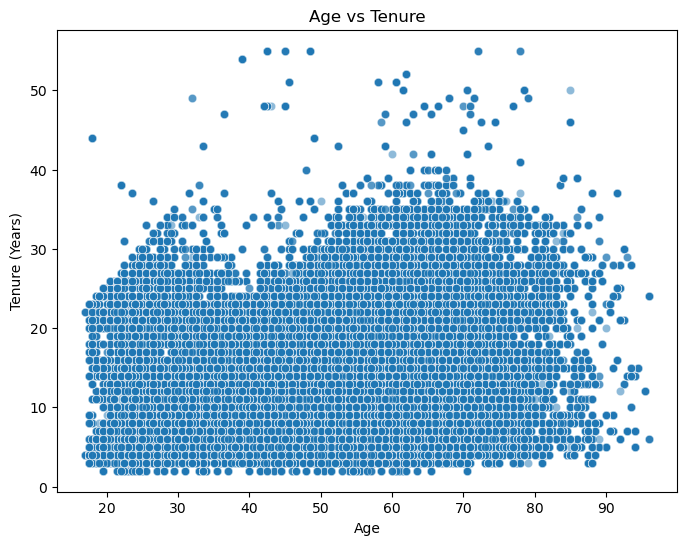

In [40]:
# Relationship between Age and Tenure
plt.figure(figsize=(8,6))
sns.scatterplot(x='clnt_age', y='clnt_tenure_yr', data=df_full, alpha=0.5)
plt.title('Age vs Tenure')
plt.xlabel('Age')
plt.ylabel('Tenure (Years)')
plt.show()




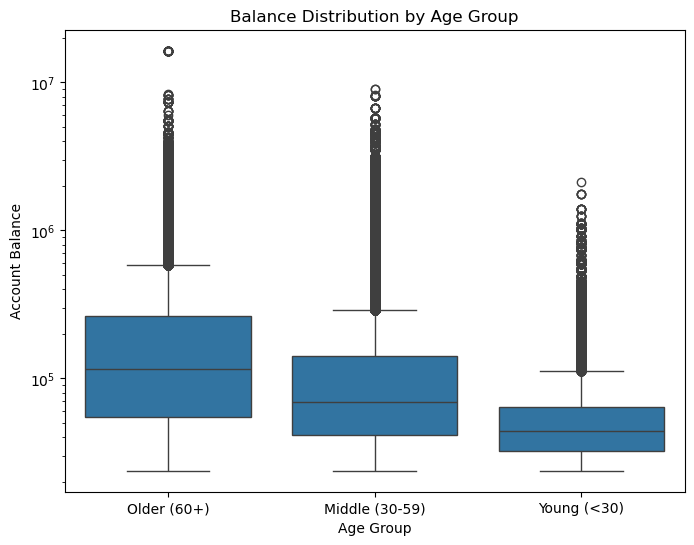

In [41]:
# Define age groups
def age_group(age):
    if age < 30:
        return 'Young (<30)'
    elif age < 60:
        return 'Middle (30-59)'
    else:
        return 'Older (60+)'

df_full['age_group'] = df_full['clnt_age'].apply(age_group)

# Boxplot of balance by age group
plt.figure(figsize=(8,6))
sns.boxplot(x='age_group', y='bal', data=df_full)
plt.title('Balance Distribution by Age Group')
plt.ylabel('Account Balance')
plt.xlabel('Age Group')
plt.yscale('log') # because balance probably has heavy skew
plt.show()


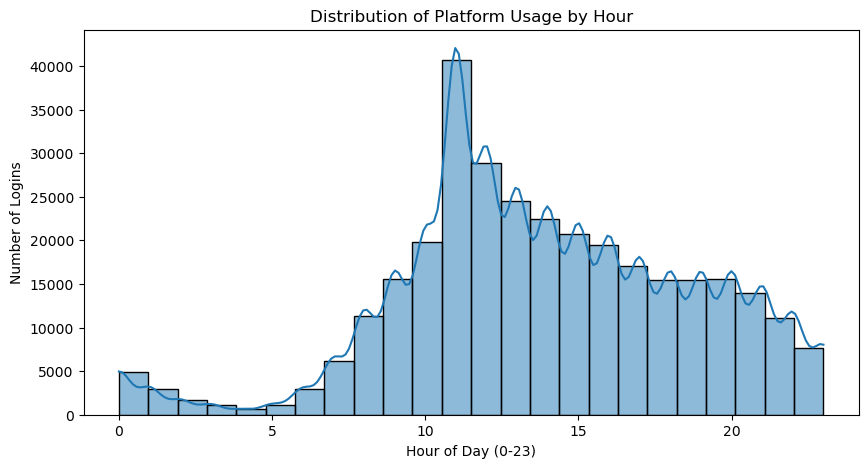

In [42]:
# Extract hour from date_time
df_full['hour'] = df_full['date_time'].dt.hour

# Plot usage times
plt.figure(figsize=(10,5))
sns.histplot(df_full['hour'], bins=24, kde=True)
plt.title('Distribution of Platform Usage by Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Logins')
plt.show()


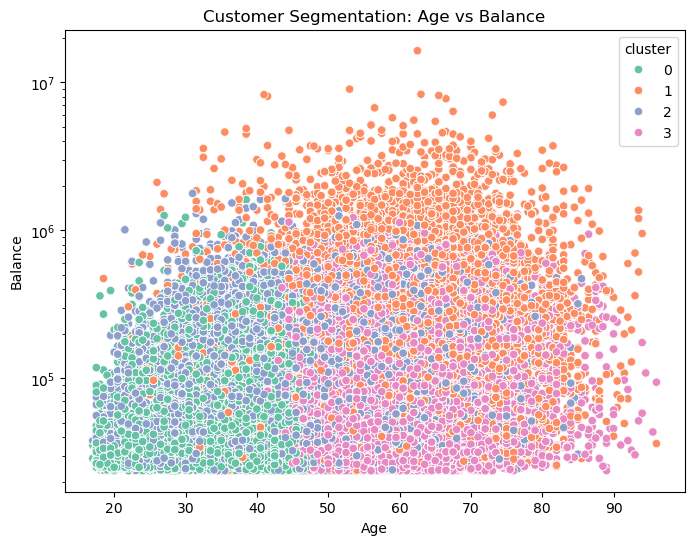

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = df_full[['clnt_age', 'clnt_tenure_yr', 'bal', 'logons_6_mnth']].dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add clusters to df
features['cluster'] = clusters

# Visualize clusters age vs balance
plt.figure(figsize=(8,6))
sns.scatterplot(x=features['clnt_age'], y=features['bal'], hue=features['cluster'], palette='Set2')
plt.title('Customer Segmentation: Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.yscale('log')
plt.show()


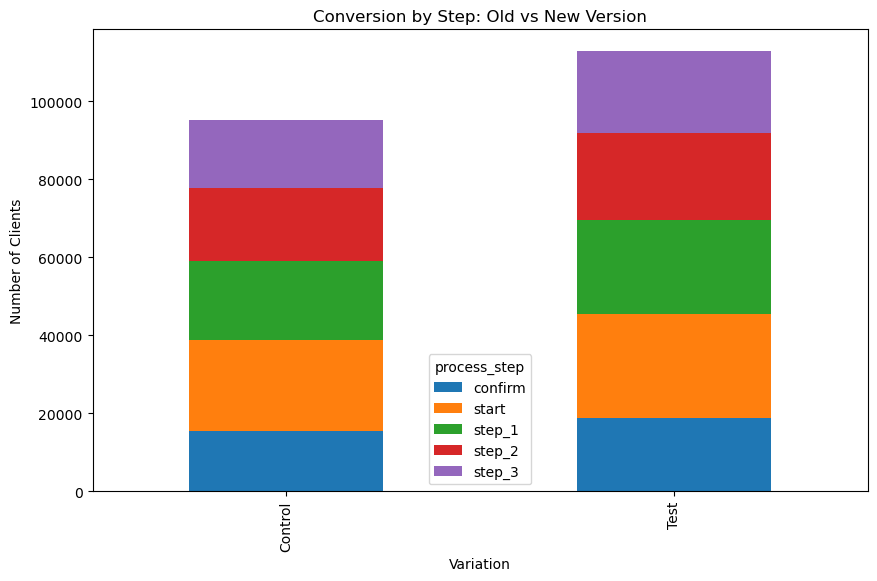

In [44]:
conversion_counts = df_full.groupby(['Variation', 'process_step'])['client_id'].nunique().unstack()
conversion_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Conversion by Step: Old vs New Version')
plt.xlabel('Variation')
plt.ylabel('Number of Clients')
plt.show()


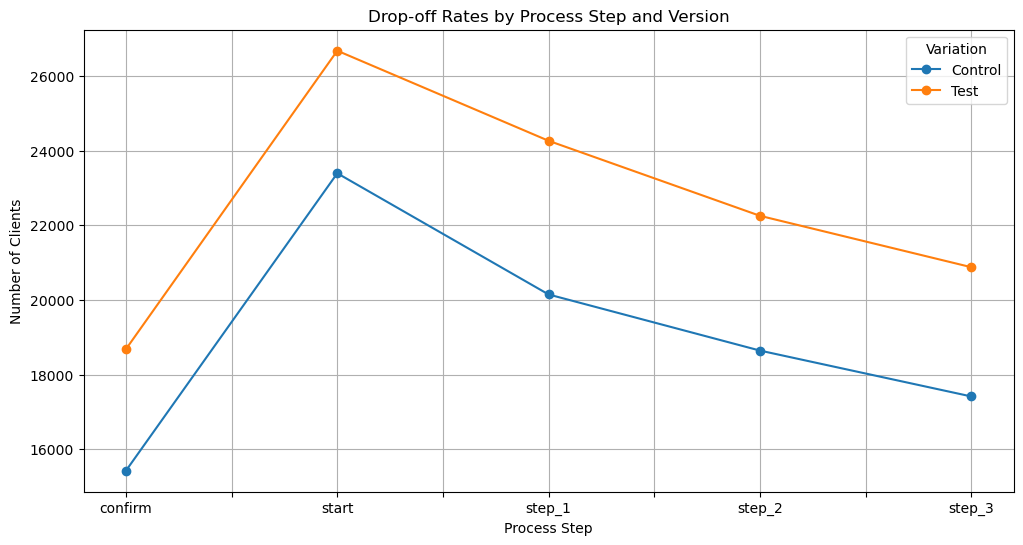

In [45]:
step_counts = df_full.groupby(['process_step', 'Variation'])['client_id'].nunique().unstack()
step_counts.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Drop-off Rates by Process Step and Version')
plt.xlabel('Process Step')
plt.ylabel('Number of Clients')
plt.grid()
plt.show()


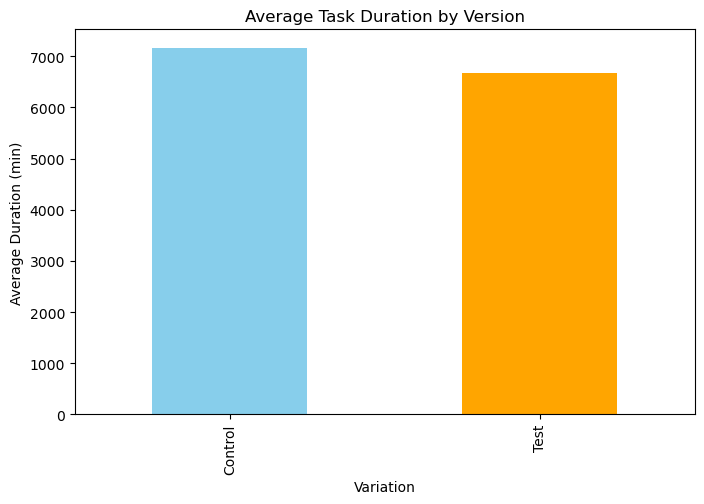

In [46]:
# Calculate session duration per client visit
session_times = df_full.groupby(['client_id', 'Variation'])['date_time'].agg(['min', 'max'])
session_times['duration_min'] = (session_times['max'] - session_times['min']).dt.total_seconds() / 60

# Average session duration by Variation
session_duration_avg = session_times.groupby('Variation')['duration_min'].mean()
session_duration_avg.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8,5))
plt.title('Average Task Duration by Version')
plt.ylabel('Average Duration (min)')
plt.xlabel('Variation')
plt.show()


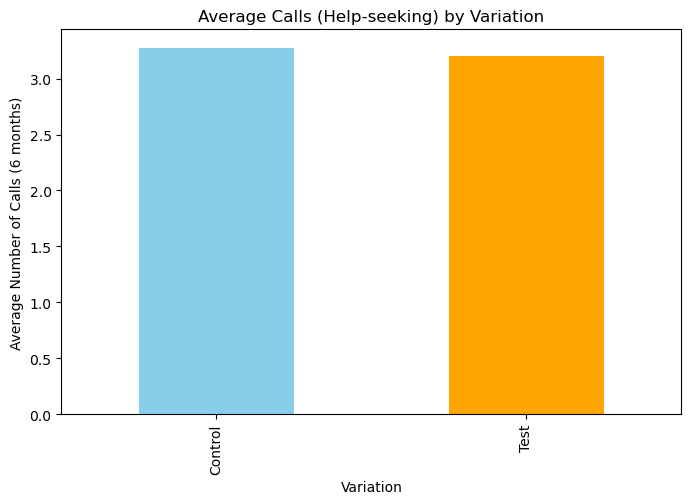

In [47]:
calls_help = df_full.groupby('Variation')['calls_6_mnth'].mean()
calls_help.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8,5))
plt.title('Average Calls (Help-seeking) by Variation')
plt.ylabel('Average Number of Calls (6 months)')
plt.xlabel('Variation')
plt.show()


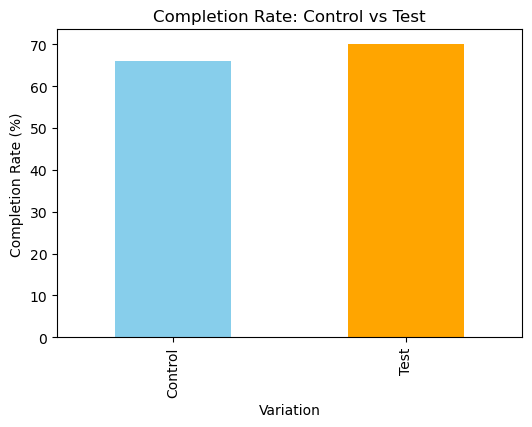

In [48]:
def plot_completion_rate(df):
    # Define Completion: users reaching 'confirm'
    total_started = df[df['process_step'] == 'start'].groupby('Variation')['client_id'].nunique()
    total_completed = df[df['process_step'] == 'confirm'].groupby('Variation')['client_id'].nunique()
    
    completion_rate = (total_completed / total_started) * 100
    completion_rate.plot(kind='bar', color=['skyblue', 'orange'], figsize=(6,4))
    
    plt.title('Completion Rate: Control vs Test')
    plt.ylabel('Completion Rate (%)')
    plt.xlabel('Variation')
    plt.show()
plot_completion_rate(df_full)


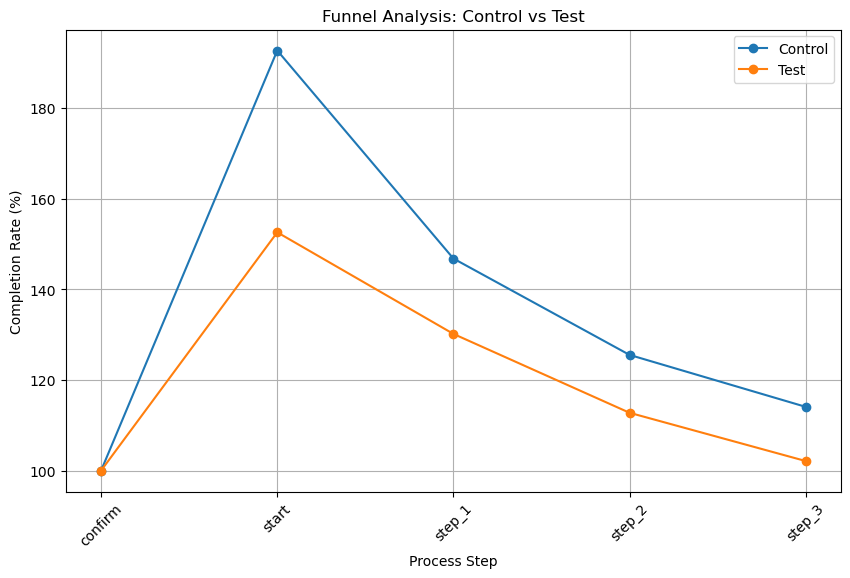

In [52]:
# Step counts per variation and process_step
funnel_counts = df_full.groupby(['Variation', 'process_step'])['visit_id'].nunique().reset_index()
funnel_pivot = funnel_counts.pivot(index='process_step', columns='Variation', values='visit_id').fillna(0)
funnel_pivot = funnel_pivot.astype(int).sort_index()

# Normalize as percentage of the first step (Start or Initial)
funnel_normalized = funnel_pivot.divide(funnel_pivot.iloc[0]) * 100

funnel_pivot, funnel_normalized  # You can plot these to show drop-off or completion %
# Plotting the funnel
plt.figure(figsize=(10, 6)) 
plt.plot(funnel_normalized.index, funnel_normalized['Control'], marker='o', label='Control')
plt.plot(funnel_normalized.index, funnel_normalized['Test'], marker='o', label='Test')
plt.title('Funnel Analysis: Control vs Test')   
plt.xlabel('Process Step')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [55]:

step_order = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_full['step_num'] = df_full['process_step'].map(step_order)

# Detect backward movements (errors)
df_full_sorted = df_full.sort_values(['visitor_id', 'visit_id', 'date_time'])
df_full_sorted['prev_step'] = df_full_sorted.groupby(['visitor_id', 'visit_id'])['step_num'].shift(1)
df_full_sorted['is_error'] = (df_full_sorted['step_num'] < df_full_sorted['prev_step'])

# Aggregate error counts by step and variation
errors_by_step = df_full_sorted[df_full_sorted['is_error']].groupby(['Variation', 'process_step'])['visit_id'].nunique().reset_index(name='error_sessions')
total_by_step = df_full_sorted.groupby(['Variation', 'process_step'])['visit_id'].nunique().reset_index(name='total_sessions')

# Merge and compute error rate
error_rate_df = pd.merge(total_by_step, errors_by_step, on=['Variation', 'process_step'], how='left')
error_rate_df['error_sessions'] = error_rate_df['error_sessions'].fillna(0)
error_rate_df['error_rate'] = (error_rate_df['error_sessions'] / error_rate_df['total_sessions']) * 100

# Pivot for easy plotting
error_rate_pivot = error_rate_df.pivot(index='process_step', columns='Variation', values='error_rate').fillna(0)
error_rate_pivot


Variation,Control,Test
process_step,,
confirm,0.000000,0.000000
start,13.519723,25.455588
step_1,8.304660,9.758082
step_2,8.926531,7.532764
step_3,0.710654,0.130748
